In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import emcee
import corner
import chainconsumer

import parameter_estimation_micro_qcd
import axion_mass
import g_star
import eom
import time_temp
import potential
import config
import density_plot
import solver2

In [5]:
import t_ratio_parameter_estimation
df = np.load(config.data_path + "/T_ratio_micro_qcd_parameter.npz")
samples = df["samples"]
single_chains = samples.reshape((-1, 5))
names = t_ratio_parameter_estimation.parameter_names

In [3]:
# fn = emcee.autocorr.function(single_chains)
autocorr_fn = np.load(config.data_path + "/autocorr_fn_micro_qcd.npz")

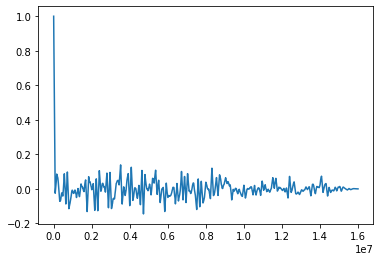

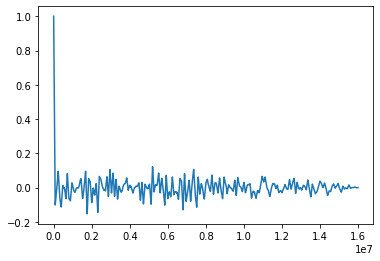

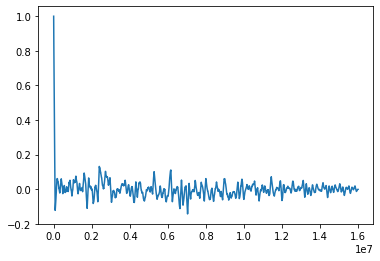

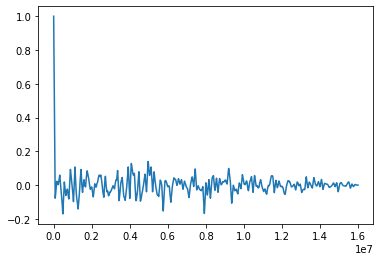

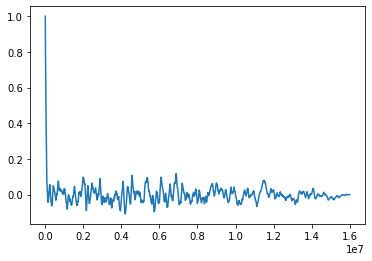

In [4]:
for i in range(5):
    plt.plot(autocorr_fn[:, i])
    plt.show()

In [1]:
for i in range(single_chains.shape[1]):
    plt.plot(single_chains[:, i])
    plt.show()

NameError: name 'single_chains' is not defined

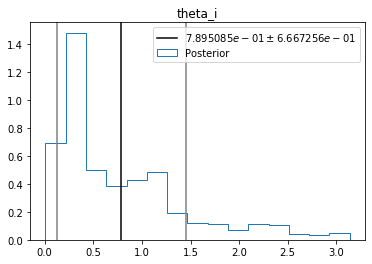

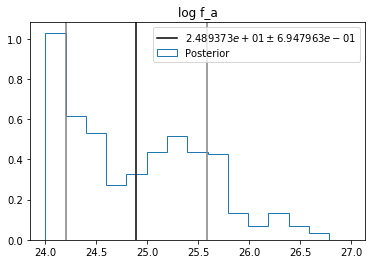

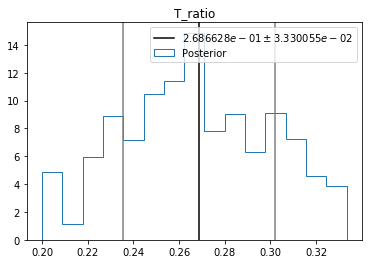

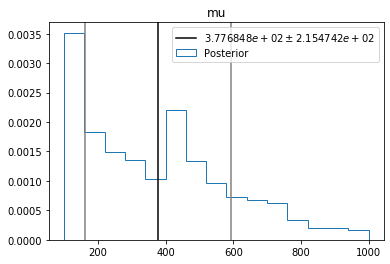

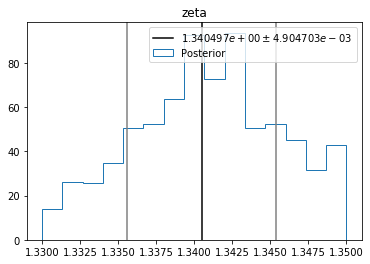

In [23]:
take = single_chains.shape[0] // 4
for i, name in enumerate(names):
    plt.title(name)
    std = np.std(single_chains[:, i])
    mean = np.mean(single_chains[:, i])
    plt.hist(single_chains[take: , i], bins=15, density=True, histtype="step", label="Posterior")
    plt.axvline(mean - std, color="grey")
    plt.axvline(mean + std, color="grey")
    plt.axvline(mean, color="black", label=r"$%e \pm %e$" % (mean, std))
    plt.legend()
    plt.show()

In [ ]:
mu = single_chains[take:, -2]
f_a = 10**single_chains[take:, 1]
m_a = mu**2 / (np.sqrt(2) * f_a)
std = np.std(m_a)
mean = np.mean(m_a)
plt.hist(m_a, bins=50, density=True, histtype="step", label="Posterior")
plt.axvline(mean - std, color="grey")
plt.axvline(mean + std, color="grey")
plt.axvline(mean, color="black", label=r"$%e \pm %e$" % (mean, std))
plt.title("m_a")
plt.xlim((-1e-19, 1e-19))
plt.legend()

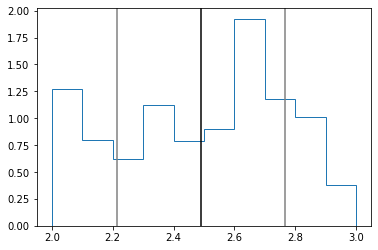

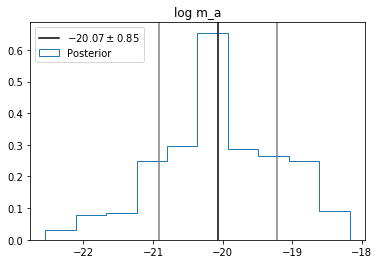

In [41]:
mu = single_chains[take:, -2]
f_a = 10**single_chains[take:, 1]
m_a = mu**2 / (np.sqrt(2) * f_a)
log_m_a = np.log10(m_a)

log_mu = np.log10(mu)
mean = np.mean(log_mu)
std = np.std(log_mu)
plt.axvline(mean - std, color="grey")
plt.axvline(mean + std, color="grey")
plt.axvline(mean, color="black", label=r"$%e \pm %e$" % (mean, std))
plt.hist(log_mu, density=True, histtype="step", label="Posterior")
plt.show()

std = np.std(log_m_a)
mean = np.mean(log_m_a)
plt.hist(log_m_a, density=True, histtype="step", label="Posterior")
plt.axvline(mean - std, color="grey")
plt.axvline(mean + std, color="grey")
plt.axvline(mean, color="black", label=r"$%.2f \pm %.2f$" % (mean, std))
plt.title("log m_a")
# plt.xlim((-1e-19, 1e-19))
plt.legend()

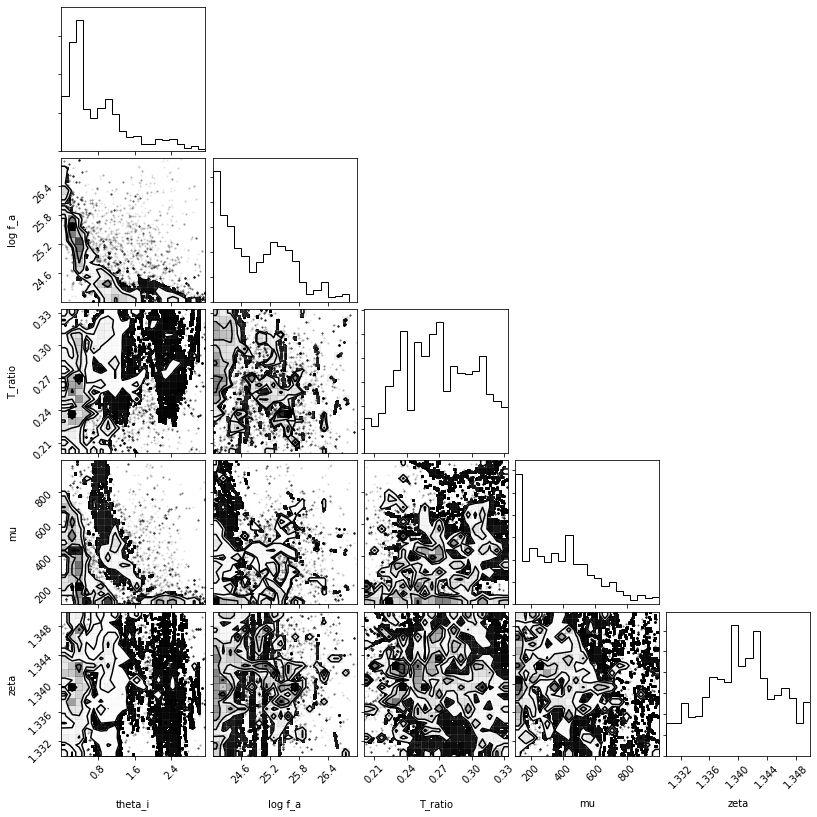

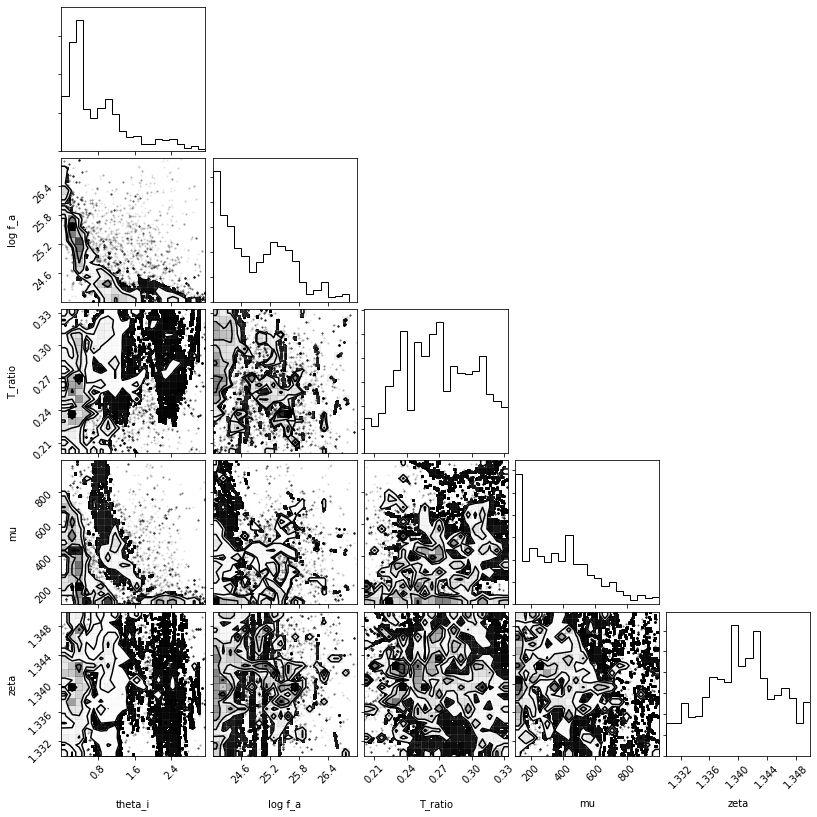

In [38]:
corner.corner(single_chains, labels=t_ratio_parameter_estimation.parameter_names)

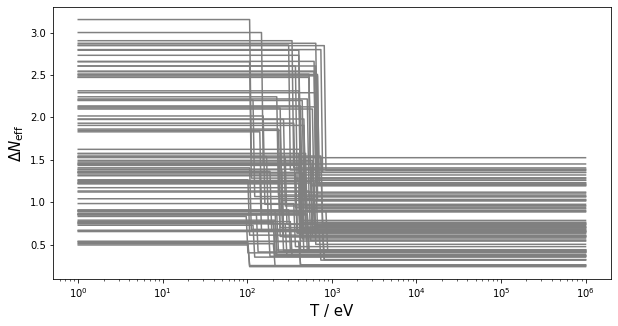

In [54]:
from g_star import compute_Delta_N_eff

T = np.geomspace(1, 1e6, 300)

plt.figure(figsize=(10,5))
plt.xlabel("T / eV", fontsize=15)
plt.ylabel(r"$\Delta N _ \mathrm{eff}$", fontsize=15)

i = np.random.choice(single_chains.shape[0], 100, replace=False)
t_ratios = single_chains[i, 2]
mus = single_chains[i, -2]
for t_ratio, mu in zip(t_ratios, mus):
    plt.semilogx(T, list(map(lambda T: compute_Delta_N_eff(t_ratio, T, mu), T)), color="grey")
# plt.ylim((-0.1, 1))

In [ ]:
for i, name in enumerate(names):
    c = emcee.autocorr.function(single_chains[:, i])
    plt.plot(c)
    plt.title(name)
    plt.show()

In [ ]:
for i, name in enumerate(names):
    plt.plot(single_chains[:, i])
    plt.title(name)
    plt.show()

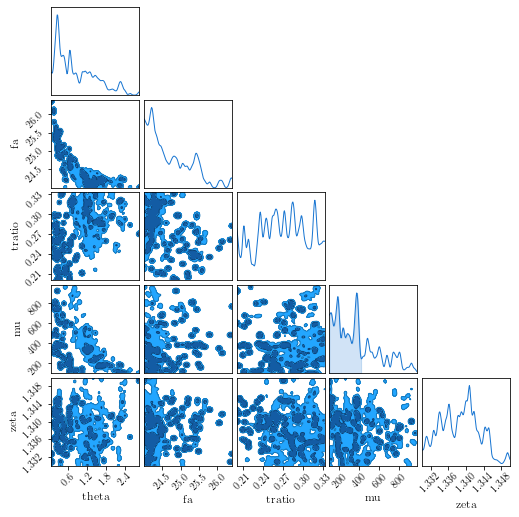

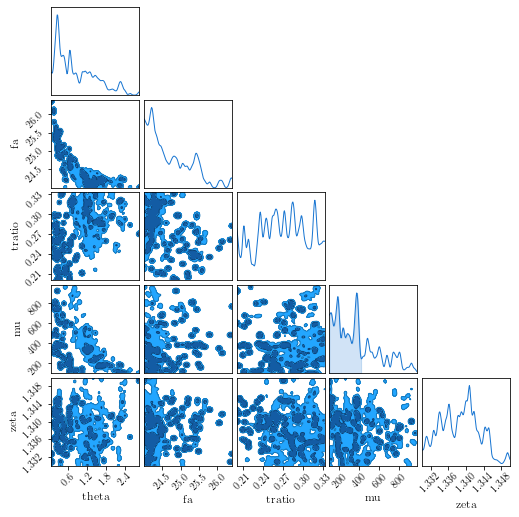

In [8]:
c = chainconsumer.ChainConsumer()
names = ["theta", "fa", "tratio", "mu", "zeta"]
c.add_chain(single_chains, parameters=names)
c.plotter.plot()